<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Projet Data Science</h1></center>
<center><h2>Introduction</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

<blockquote>
Ce module est destiné à montrer le déroulement d'un projet de Data Science et d'illuster les différentes étapes.<br>
Ici, nous allons nous placer dans la peau d'un site de e-commerce. Notre problématique est simple: améliorer les ventes. Elle est simple mais elle est aussi très large... Que veut dire améliorer les ventes?
<br>
Lorsque l'on définit une telle problématique à résoudre, il est intéressant de se poser la question des données à disposition: à quelles données ai-je accès (en interne ou en open data)? Si mes données ne sont pas suffisantes, comment puis-je les compléter (acheter des données, trouver des jeux libres d'accès sur internet, constituer soi-même des jeux de données supplémentaires avec du <i>scraping</i> par exemple, ...)? Est-ce que je connais ce que les données signifient? Et si non, qui peut me renseigner? Comment ces données ont été constituée? Quand l'ont-elles été?  Est-ce que ces données sont de qualité? 

<br>
<br>
Ici, nous n'allons pas essayer de répondre à ces questions mais elles sont essentielles pour proposer des modèles pertinents tout en connaissant les limites de ce modèle. Le jeu de données utilisé ici est nommé <code>events.csv</code> et contient une liste d'événements sur un site de e-commerce. Il fait partie d'un ensemble plus complexes de données disponible <a href="https://www.kaggle.com/retailrocket/ecommerce-dataset">ici</a>.
    <div class="alert-danger">
        Dans ce module, nous ne nous attachons pas tant à la forme qu'au fond: parfois les solutions aux questions seront plus élaborées que ce que demandait la question. On peut obtenir les réponses aux questions de manière plus simple que ce que nous proposons comme réponses mais nos solutions sont ici des alternatives intéressantes pour aller plus loin dans les détails.
    </div>
</blockquote>

* importer <code>pandas</code> et charger le jeu de données
* afficher les 5 premières lignes    

In [2]:
# Insérer le code ici

In [3]:
# Insérer le code ici

import pandas as pd 

df = pd.read_csv('events.csv')
df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


* vérifier le type des données avec la méthode <code>info</code>

In [4]:
# Insérer le code ici

In [5]:
# Insérer le code ici

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
timestamp        int64
visitorid        int64
event            object
itemid           int64
transactionid    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


<hr style="border-width:2px;border-color:#75DFC1">
<center><h2>Description des données</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

<blockquote>
Les variables contenues dans ce jeu de données sont:
<ul>
    <li><code>timestamp</code>: timestamp représentant la date et l'heure à laquelle a eu lieu l'événement.</li>
    <li><code>visitorid</code>: nombre qui représente un unique visiteur du site acteur de l'événement.</li>
    <li><code>event</code>: nature de l'événement. Peut être de 3 types différents: "view", "addtocart", "transaction" qui correspondent à la vue d'un objet, son ajout au panier ou son achat.</li>
    <li><code>itemid</code>: nombre qui représente un unique produit concerné par l'événement.</li>
    <li><code>transactionid</code>: nombre qui représente une transaction unique</li>
</ul>
    
Une des premières choses à faire est de faire l'inventaire du nombre de produits, du nombre de visiteurs, du nombre d'événements, ...             
</blockquote>

* donner le nombre d'événements, le nombre de visiteurs uniques, le nombre de produits uniques, la date de début de collecte des données et la date de fin de collecte (pour ce dernier point, on peut utiliser le package <code>datetime</code> et en particulier la fonction <code>datetime.fromtimestamp</code>.

In [6]:
# Insérer le code ici

import datetime

In [7]:
# Insérer le code ici

import datetime

n_events = len(df)  # le nombre d'événements correspond au nombre de lignes dans le jeu de données
n_visitors = len(df.visitorid.unique())  # le nombre de visiteurs uniques correspond au nombre de valeurs différentes de visitorid
n_products = len(df.itemid.unique())  # le nombre de produits uniques correspond au nombre de valeurs différentes de visitorid


print(u'nombre d\'événements uniques: {}'.format(n_events))
print(u'nombre de visiteurs uniques: {}'.format(n_visitors))
print(u'nombre de produits uniques: {}'.format(n_products))

start_ts, stop_ts = df.timestamp.min(), df.timestamp.max()  # on prend le min et le max de la colonne timestamp 
start = datetime.datetime.fromtimestamp(start_ts/1000)  # on change le timestamp and objet date /!\ la fonction prend des secondes et ici on a des milisecondes
stop = datetime.datetime.fromtimestamp(stop_ts/1000)  # on change le timestamp and objet date /!\ la fonction prend des secondes et ici on a des milisecondes
# remarque: je ne suis pas au courant a priori du format des données temporelles mais 
# j'essaie sans ce facteur 1000, rate puis réessaie avec différents facteurs jusqu'a avoir des valeurs logiques.
# en général, les timestamps sont données en s, ms, µs ou ns donc pas besoin d'explorer tous les facteurs... 

print(u'période: {}\t->\t{}'.format(start, stop))

nombre d'événements uniques: 2756101
nombre de visiteurs uniques: 1407580
nombre de produits uniques: 235061
période: 2015-05-03 05:00:04.384000	->	2015-09-18 04:59:47.788000


<blockquote>
Nous avons donc: 
<ul>
    <li> 2 756 101 événements uniques</li>
    <li> 1 407 580 visiteurs uniques </li>
    <li> 235 061 produits uniques </li>
</ul>

Ces événements sont collectés sur une période s'étalant de mai 2015 à septembre 2015.<br>
Nous devons aussi voir quelles sont les données manquantes: 

</blockquote>

* donner le nombre de données manquantes par variables

In [8]:
# Insérer le code ici

In [9]:
# Insérer le code ici

df.isna().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

<blockquote>
On constate que la seule variable où il manque des données est la variable <code>transactionid</code>: c'est tout à fait logique car les événements qui ne sont pas une transaction ne peuvent pas avoir de <code>transactionid</code>. Vérifions tout de même que le champs est bien renseigné pour toutes les transactions.
</blockquote>

* vérifier que les événements <code>transaction</code> ont bien un <code>transactionid</code> renseigné à chaque fois. 

In [10]:
# Insérer le code ici

In [11]:
# Insérer le code ici

print(df[df['event'] == 'transaction'].isna().sum())
print(df[df['event'] != 'transaction'].isna().sum())

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64


<blockquote>
    Ici nous avons de la "chance": le jeu de données est tres propre (il a été probablement nettoyé avant d'être mis sur Kaggle). Cela dit cette étape est très importante: elle nous permet de voir très vite quelles sont les étapes à mettre en place pour pallier à ces données manquantes: 
    <ul>
        <li>supprimer ces lignes au risque de manquer de données ou de perdre une information précieuse</li>
        <li>remplacer ces données par des moyennes, des médianes ou des modes, quitte à trop généraliser</li>
        <li>proposer un modèle plus fin (par exemple avec de l'open data: si j'ai le CSP d'un client, à partir des données de l'INSEE je peux déduire une tranche de salaire)</li>
        <li>proposer un modèle de Machine Learning pour remplacer ces données, ce qui demande du temps et de l'énergie pour des résultats non garantis.</li>
    </ul>
    Aucune de ces options n'est meilleure que les autres: ce sont simplement des choix qui dépendent de beaucoup de facteurs qui entourent ce projet de Data Science: main d'oeuvre, délais, resources, expertise, exigence de résultats, ...
    
Finalement, nous devons vérifier que les modèles de données proposés sont bien ceux que nous avons devant nous. Il faut notamment vérifier que la colonne <code>event</code> ne contient bien que les valeurs avancées plus tôt: une erreur dans la saisie, la collecte, dans le stockage ou tout simplement une mauvaise connaissance des données pourraient nous réserver des surprises. 
</blockquote>
* afficher les différentes modalités de la variable <code>event</code>.

In [12]:
# Insérer le code ici

In [13]:
# Insérer le code ici

print(df.event.unique())

['view' 'addtocart' 'transaction']


<blockquote>

Les informations données plus tôt étaient effectivement les bonnes. On peut déjà déduire plusieurs choses de cette méta-analyse: 
<ul> 
    <li>Nous savons ce à quoi correspond chacune des variables, leurs modalités ou leur format</li>
    <li>Nous n'allons pas avoir de problème de données manquantes, ce qui va nous faire gagner pas mal de temps.</li>
    <li>Le jeu de données est plutôt conséquent: plus de 2,7 millions de lignes: il faudra faire attention à ce facteur et peut être adapté les resources en fonction</li>
    </ul>
    Cette première étape nous permet donc de dresser les contours de notre jeu de données et donc d'accélérer la suite.<br>
    Nous devons aussi vérifier quelques mécaniques de base. Dans un premier temps essayons de comprendre comment fonctionne le <code>transactionid</code>.
    </blockquote>
   
* compter le nombre de valeurs par <code>transactionid</code> en utilisant la méthode <code>value_counts</code> et attribuer les résultats à la variable <code>transactions_counts</code>
* afficher le contenu de cette variable

In [12]:
# Insérer le code ici

In [15]:
# Insérer le code ici

transactions_counts = df['transactionid'].value_counts()
print(transactions_counts)

7063.0     31
765.0      28
8351.0     27
2753.0     23
6993.0     21
           ..
11740.0     1
11739.0     1
11738.0     1
11737.0     1
2.0         1
Name: transactionid, Length: 17672, dtype: int64


<blockquote>
    <p>On remarque que certains <code>transactionid</code> reviennent plusieurs fois. En effet, il doit y avoir une seule transaction même si on achète plusieurs produits.</p>
    <p>Vérifions celà.</p> 
    </blockquote>
    
* sélectionner les lignes de <code>df</code> correspondant au <code>transactionid</code> qui a le plus de lignes et les stocker dans un <code>pd.DataFrame</code> nommé <code>df_transactions_max</code>.

In [12]:
# Insérer le code ici

In [19]:
# Insérer le code ici

df_transactions_max = df[df.transactionid == transactions_counts.idxmax()]
df_transactions_max.head()

,timestamp,visitorid,event,itemid,transactionid
1681322,1431626724598,761482,transaction,238209,7063.0
1681331,1431626724613,761482,transaction,108096,7063.0
1681337,1431626724723,761482,transaction,222328,7063.0
1681359,1431626724912,761482,transaction,310525,7063.0
1681365,1431626724959,761482,transaction,265846,7063.0


<blockquote>
    <p>On voit plusieurs choses:</p>
    <ul>
        <li>on peut voir différents <code>itemid</code> pour un seul <code>transactionid</code>: on peut donc bien acheter plusieurs objets en même temps.</li>
        <li>les timestamps des différents produits ne sont pas les mêmes...</li>
    </ul>
    <p>Nous allons essayer d'explorer ce second point.</p>
</blockquote>

* avec un graphique afficher la distribution des <code>timestamp</code> de <code>df_transactions</code>

In [12]:
# Insérer le code ici

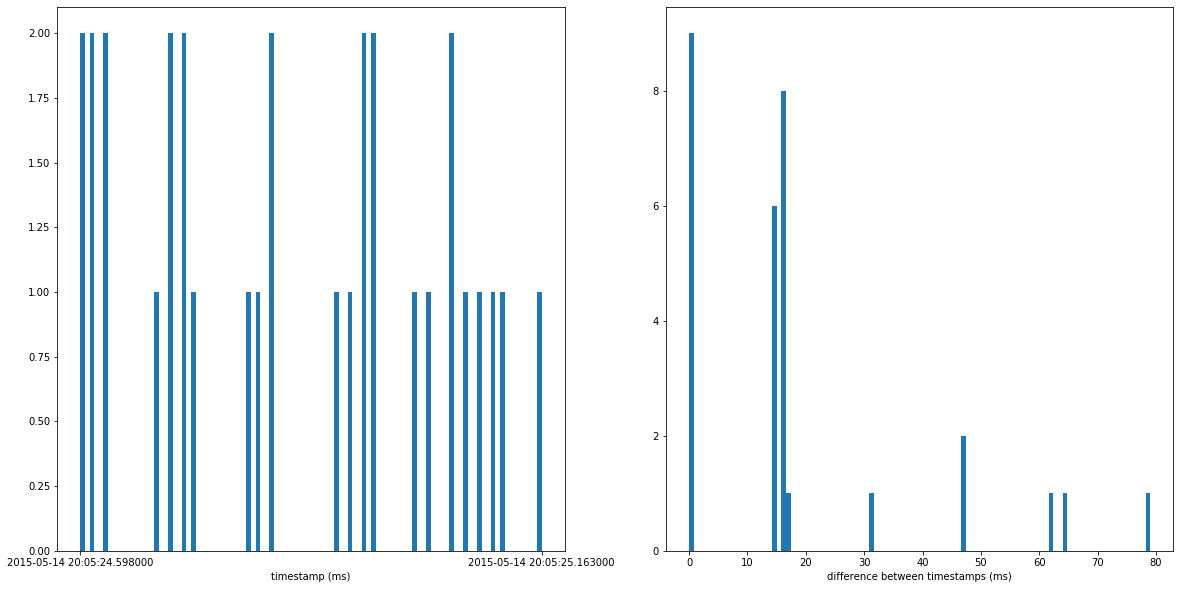

In [76]:
# Insérer le code ici

import matplotlib.pyplot as plt
%matplotlib inline

df_transactions_max = df_transactions_max.sort_values(['timestamp'])

df_transactions_max['timestamp_diff'] = df_transactions_max['timestamp'].diff()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].hist(df_transactions_max['timestamp'], bins=100)

timestamp_min, timestamp_max = df_transactions_max['timestamp'].min(),df_transactions_max['timestamp'].max()

axes[0].set_xticks([timestamp_min, timestamp_max])
axes[0].set_xticklabels( 
    [datetime.datetime.fromtimestamp(timestamp_min/1000),
     datetime.datetime.fromtimestamp(timestamp_max/1000)]
)

axes[0].set_xlabel('timestamp (ms)')
axes[1].set_xlabel('difference between timestamps (ms)')

axes[1].hist(df_transactions_max['timestamp_diff'].dropna(), bins=100)

plt.show()

<blockquote>
    <p>On peut voir que les événements correspondant à un même <code>transactionid</code> arrivent tous dans une fenêtre de temps de moins d'une seconde. On peut imaginer donc qu'en réalité elles ont lieu en même temps mais que le système les ingére avec un petit différentiel de temps. On pourra retravailler le jeu de données de manière à combiner ces événements différents en un seul événement.</p>
    <p>Dans cette partie, nous avons posé les bases de notre problème: on sait maintenant de quoi sont constituées nos données. Par la suite, nous allons constituer des jeux de données plus précis pour explorer les données plus en profondeur et mieux comprendre les comportements sur le site.</p>
</blockquote>